**Data cleaning and question 2**

2) Does the grade given to my house affect its price? If my house has a grade of 7, what else will affect its price?

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("clean_data.csv")

In [2]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_house,renovated
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,0.0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,1.0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,0.0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,0.0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,0.0


We saw in question 1 that the grade of a house does indeed influences the price of a house with a waterfront view. We would like to see whether the same effect is replicated for properties which don't have a waterfront view.

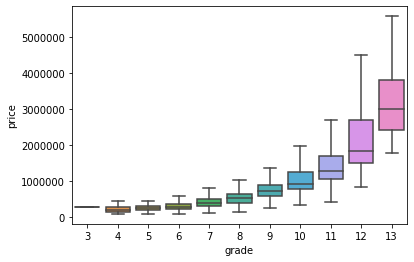

In [3]:
sns.boxplot(x = 'grade', y = 'price', data = df, showfliers = False)

The boxplot above shows us that there is a strong correlation between a house's grade and its price. The effect seems to be stronger for properties with a grade of 9 or above.

We would like to test whether other factors can influence the price of a house if we look at houses with a grade which sits in the middle range of the grading system (7). We will select for these properties in the first instance.

In [4]:
df_grade7 = df.loc[df["grade"] == 7]

In [5]:
df_grade7.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_house,renovated
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,0.0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,1.0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,0.0
6,6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,19,0.0
7,7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,...,1963,0.0,98198,47.4095,-122.315,1650,9711,2015,52,0.0


In [6]:
df_grade7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8973 entries, 0 to 21595
Data columns (total 25 columns):
Unnamed: 0       8973 non-null int64
id               8973 non-null int64
date             8973 non-null object
price            8973 non-null float64
bedrooms         8973 non-null int64
bathrooms        8973 non-null float64
sqft_living      8973 non-null int64
sqft_lot         8973 non-null int64
floors           8973 non-null float64
waterfront       8973 non-null float64
view             8973 non-null float64
condition        8973 non-null int64
grade            8973 non-null int64
sqft_above       8973 non-null int64
sqft_basement    8973 non-null float64
yr_built         8973 non-null int64
yr_renovated     8973 non-null float64
zipcode          8973 non-null int64
lat              8973 non-null float64
long             8973 non-null float64
sqft_living15    8973 non-null int64
sqft_lot15       8973 non-null int64
year_sold        8973 non-null int64
age_house        8973 

The grading system for houses in the King County area runs from 1 to 13. There are 8974 properties in our dataset with a grade of 7. We will select for these rows in the first instance.

We can examine different factors in turn which a client might be able to affect and so increase their property's sale price.

Sqft living

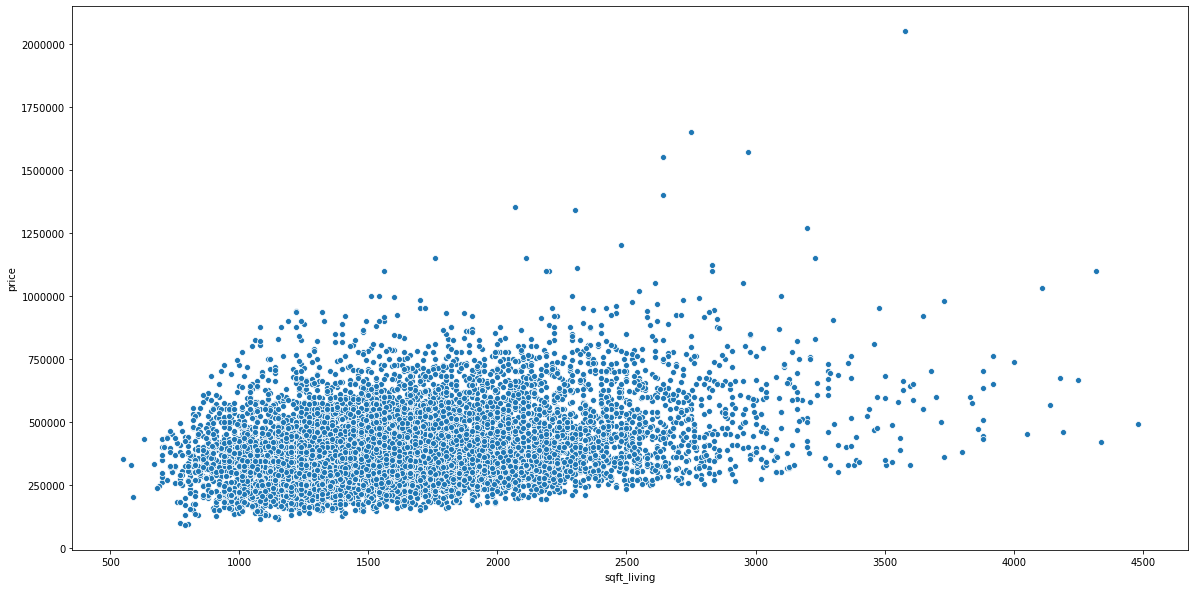

In [7]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price",
                      data=df_grade7)

As can be seen from the scatterplot above, the sqft living area of a house seems to have a significant effect on the price of a house with a grade 7.

If we remove outliers from our dataset (houses with very large sqft living areas, for example), we will be able to compare the effect of sqft living on price more closely.

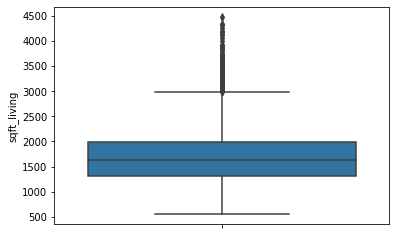

In [8]:
sns.boxplot(y = 'sqft_living', data = df_grade7, showfliers = True)

In [9]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #this calculates the interquartile range
   fence_low  = q1 - (1.5*iqr) #this removes the outliers at the lower range of the dataset for price
   fence_high = q3 + (1.5*iqr) #this removes the outliers at the higher range of the dataset for price
   df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
   return df_out

In [10]:
df1 = remove_outlier(df_grade7,'sqft_living')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8816 entries, 0 to 21595
Data columns (total 25 columns):
Unnamed: 0       8816 non-null int64
id               8816 non-null int64
date             8816 non-null object
price            8816 non-null float64
bedrooms         8816 non-null int64
bathrooms        8816 non-null float64
sqft_living      8816 non-null int64
sqft_lot         8816 non-null int64
floors           8816 non-null float64
waterfront       8816 non-null float64
view             8816 non-null float64
condition        8816 non-null int64
grade            8816 non-null int64
sqft_above       8816 non-null int64
sqft_basement    8816 non-null float64
yr_built         8816 non-null int64
yr_renovated     8816 non-null float64
zipcode          8816 non-null int64
lat              8816 non-null float64
long             8816 non-null float64
sqft_living15    8816 non-null int64
sqft_lot15       8816 non-null int64
year_sold        8816 non-null int64
age_house        8816 

This has removed over one hundred properties from our dataset.

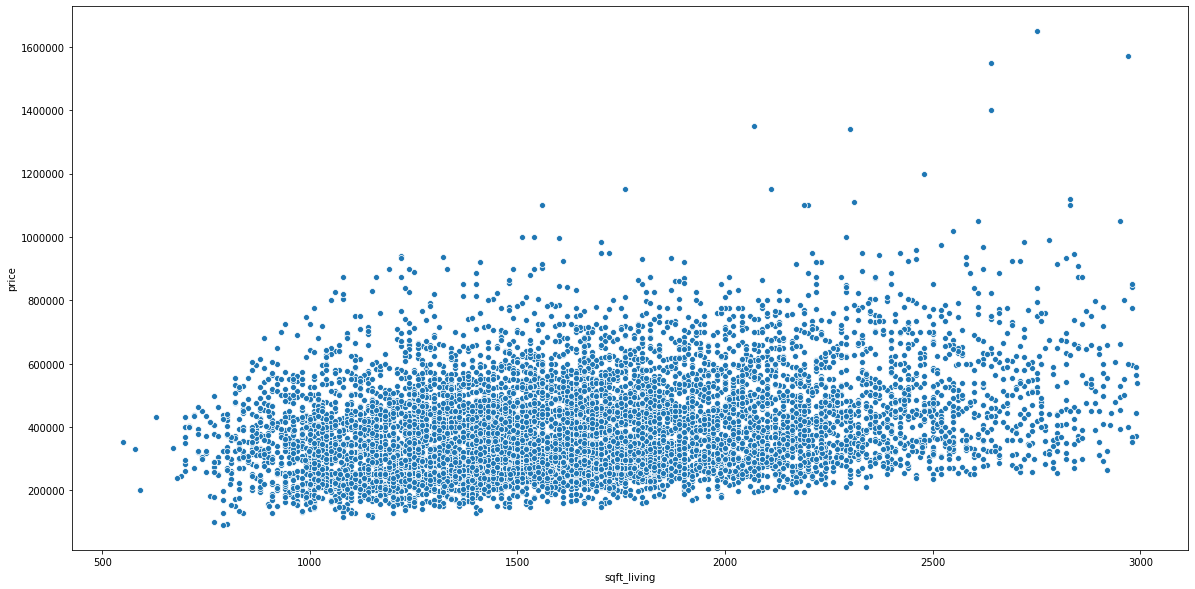

In [12]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price",
                      data=df1)

The trend here isn't so clear - there seems to be a slight increase in the price of houses with a high sqft area, although it is not very strong. The outliers in the sqft living area column have a big effect on our data.

Bathrooms

In [13]:
df1['bathrooms'].value_counts()

1.00    2083
1.75    1888
2.50    1345
2.00    1148
1.50     982
2.25     771
2.75     300
3.00     195
3.50      31
3.25      29
0.75      17
4.00      10
3.75       9
1.25       3
5.00       2
4.25       1
5.25       1
4.50       1
Name: bathrooms, dtype: int64

In [14]:
df1['bathrooms'].mean()

1.8126417876588021

In [15]:
df1['bathrooms'].median()

1.75

Although the mean and median values are quite low compared with some of the more extreme values in the bathrooms column, it will be useful to retain these (they are few in number).

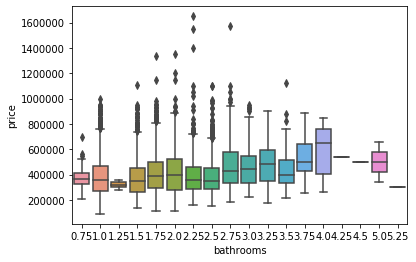

In [16]:
sns.boxplot(x = 'bathrooms', y = 'price', data = df1, showfliers = True)

Number of bathrooms has an effect on price until a certain point - a slight dip in prices can be seen around the 2.5 bathroom number and again around the 4 number. The effect is irregular.

Condition

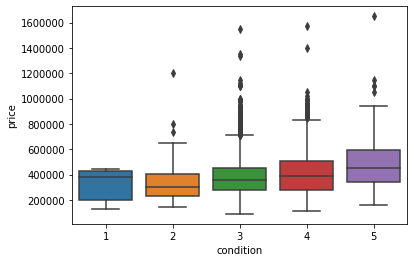

In [17]:
sns.boxplot(x = 'condition', y = 'price', data = df1, showfliers = True)

There is a steady rise in the price of a house with a grade 7 as its condition increases. However, we must be wary here: condition may be very closely related to grade.

Sqft lot

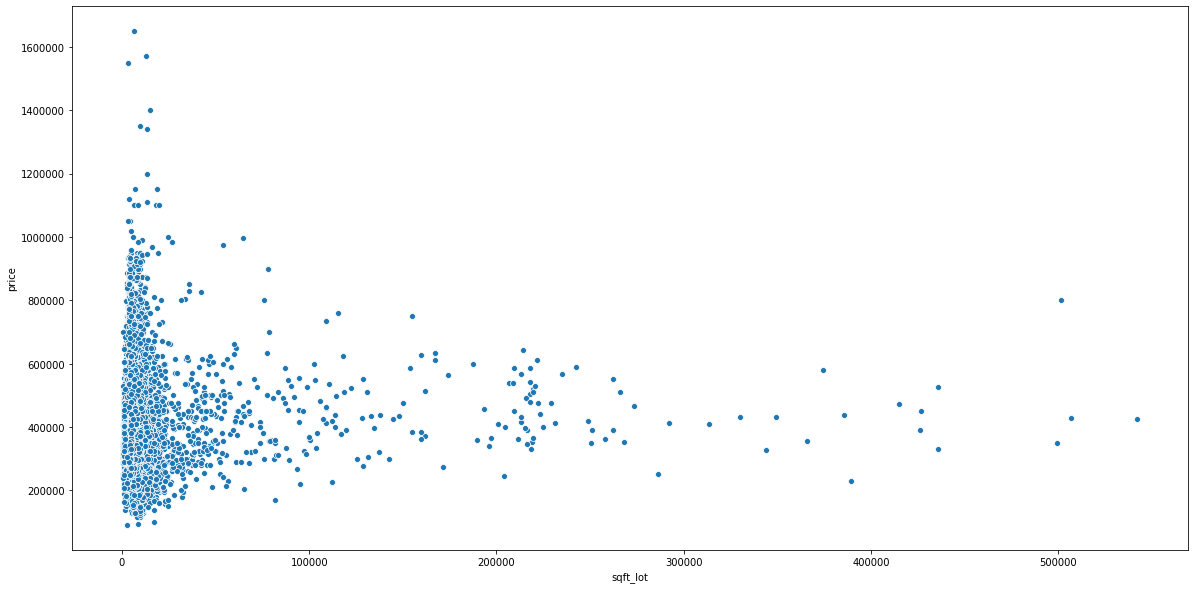

In [18]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_lot", y="price",
                      data=df1)

Again, the trend here isn't so clear. The price range for houses with smaller lots is much larger than for houses with bigger lots.

**Floors**

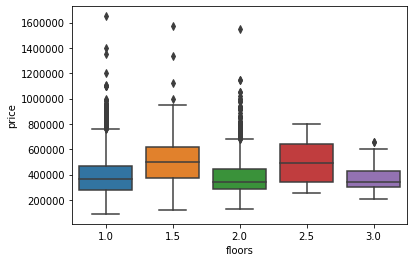

In [20]:
sns.boxplot(x = 'floors', y = 'price', data = df1, showfliers = True)

There seems to be a slight increase in the price of a house as the number of floors increases. However, this effect tails off at 2 and again at 3. It suggests mezzanines increase the house of a price. It might be worth investigating this further.

**Year renovated**

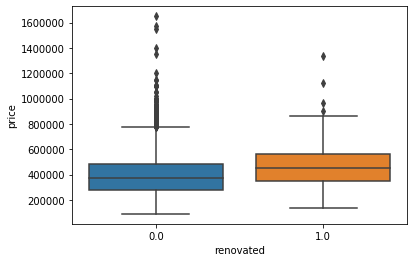

In [22]:
sns.boxplot(x = 'renovated', y = 'price', data = df1, showfliers = True)

There seems to be a slight increase in price when houses are renovated.

**Condition**

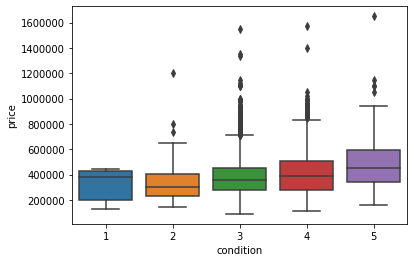

In [24]:
sns.boxplot(x = 'condition', y = 'price', data = df1, showfliers = True)

There is a clear relationship here: as the condition of a house improves, so does its condition.

**Latitude**

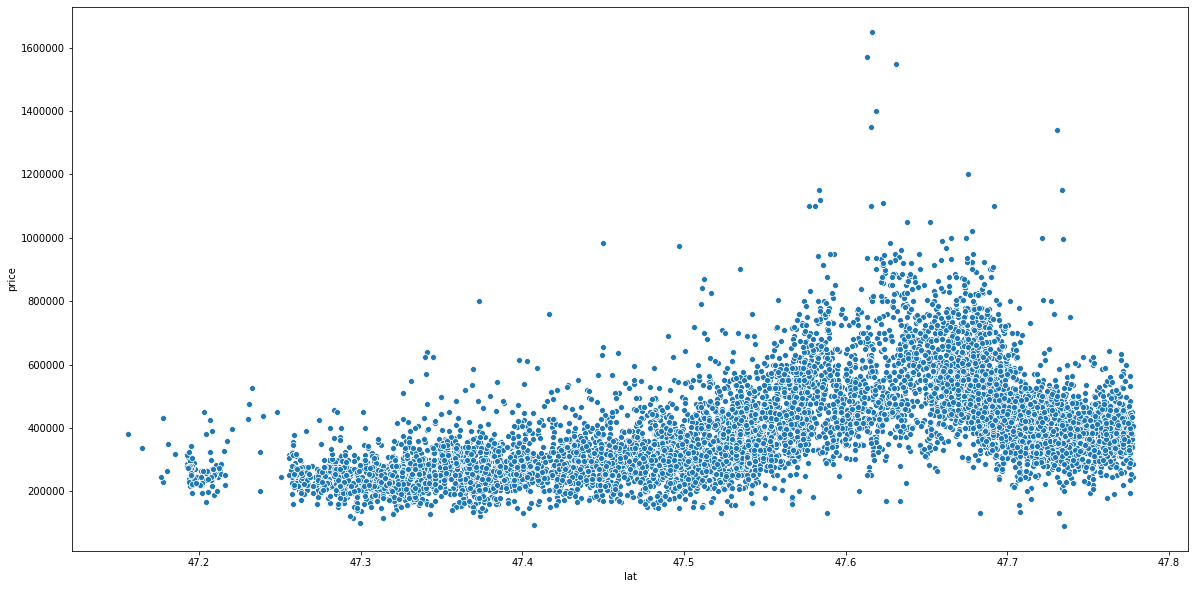

In [26]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="lat", y="price",
                      data=df1)

There seems to be an increase in price of houses which are around the 47.6 and 47.7 latitude.

**Longitude**

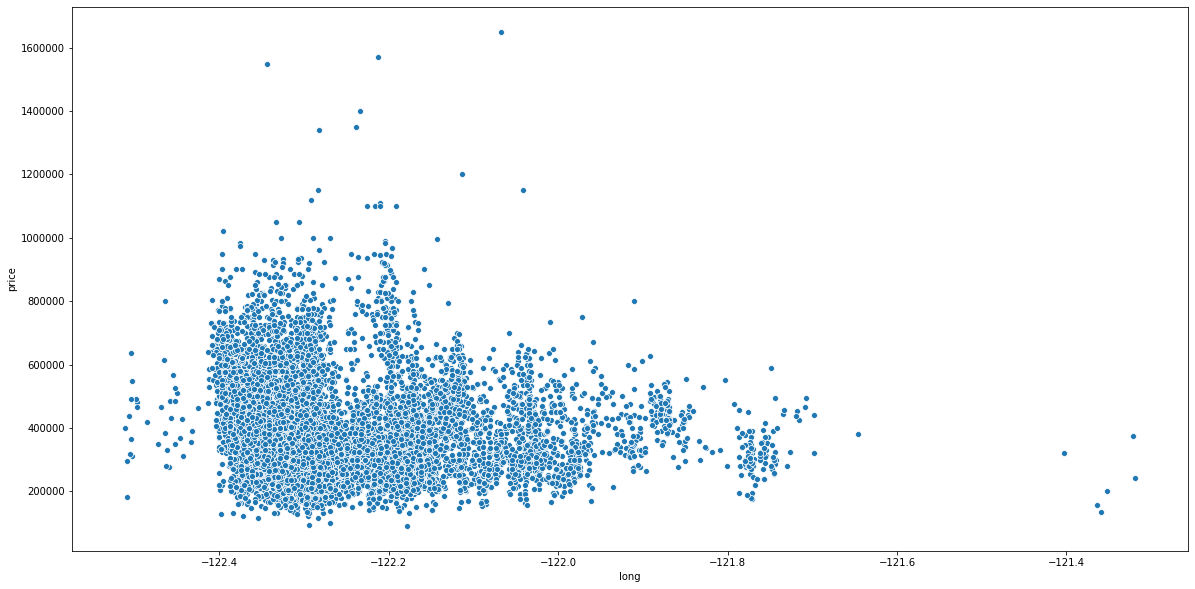

In [28]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="long", y="price",
                      data=df1)

There is a higher concentration of houses around the -122.4 and -122.2 longitudes. The price range of houses is wider here.

**Sqft living nearest 15 neighbours**

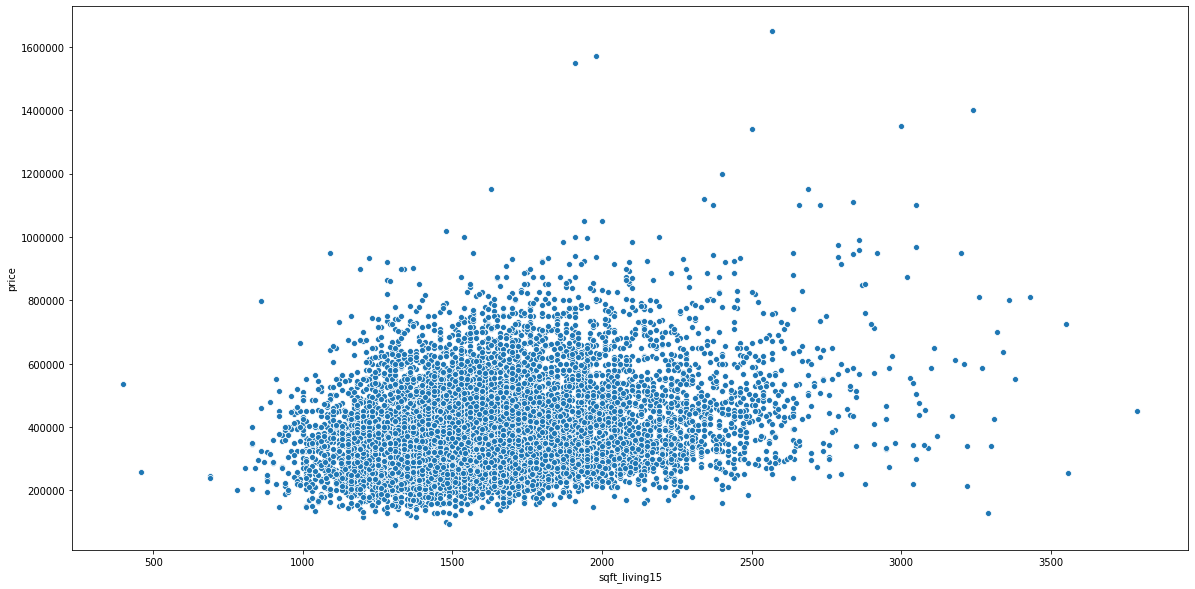

In [29]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living15", y="price",
                      data=df)

There seems to be a relationship here: the larger the mean size of a house's nearest 15 neighbours, the larger the house itself will be.

**Year built**

We can also calculate the age of a house and see whether this influences its price. We must create a new column for this.

In [30]:
df1.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_house,renovated
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,0.0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,1.0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,0.0
6,6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,19,0.0
7,7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,...,1963,0.0,98198,47.4095,-122.315,1650,9711,2015,52,0.0


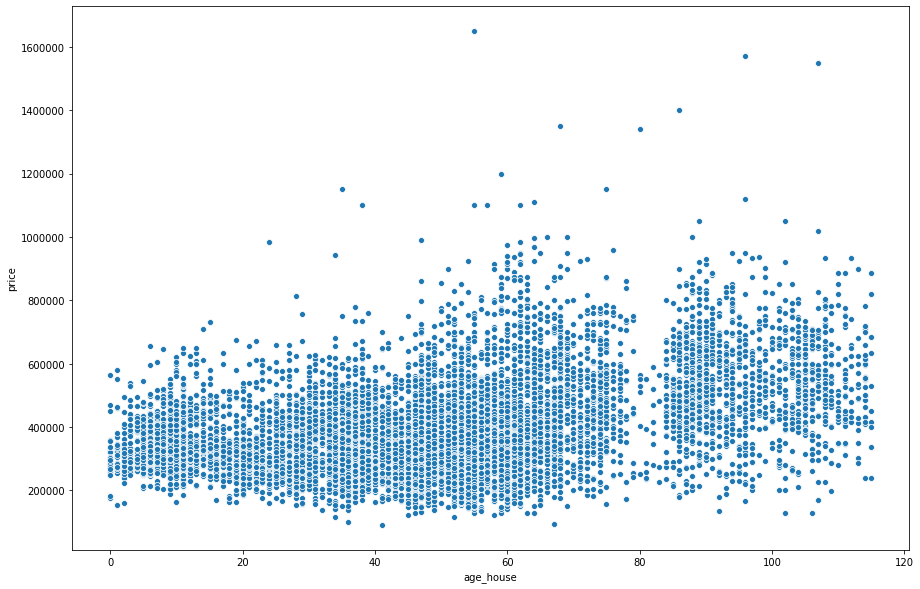

In [32]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x="age_house", y="price",
              data=df1)

The widest range of price for houses is for houses which are 60 years old. There is a slight trend which shows that the older a house, the wider the price range it may fall into.